<a id=0></a>
# 8.Numeric Features
※　数値型特徴量の取り扱い

---
### [1. スケーリング](#1)
### [2. 非線形変換](#2)
### [3.ビニング、離散化](#3)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='talk', style='darkgrid')
import japanize_matplotlib

---
<a id=1></a>
[Topへ](#0)

---
## 1. スケーリング

* スケーリングの目的
* 代表的な4つのスケーラー
* サンプルアレイの作成
* StandardScaler
* MinMaxScaler
* MaxAbsScaler
* RobustScaler
---

スケーリングの目的

In [2]:
x = np.array([1, 1, 2])
y = np.array([1, 4, 1])
X = x * 1000

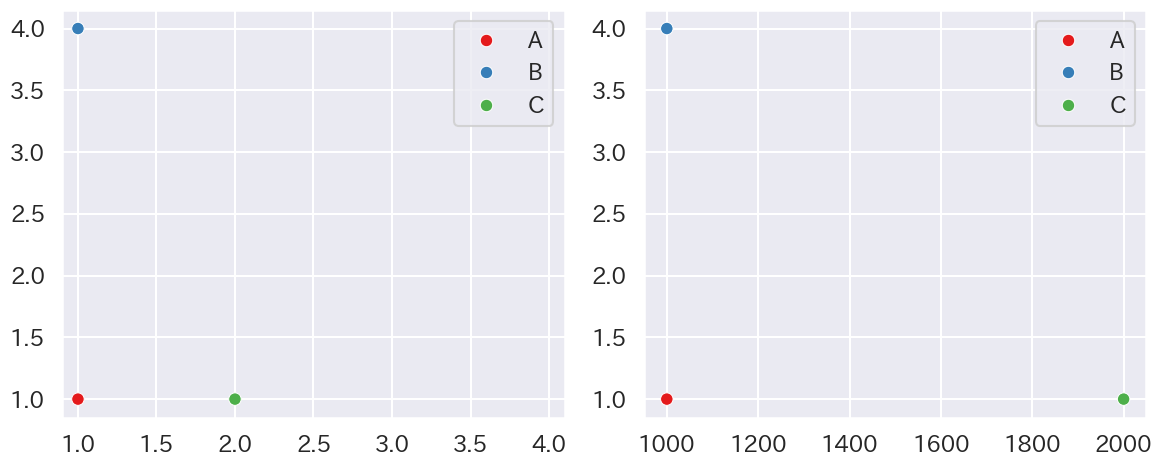

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
sns.scatterplot(x=x, y=y, ax=axes[0], hue=['A', 'B', 'C'], palette='Set1')
axes[0].set_xlim(0.9, 4.1)
sns.scatterplot(x=X, y=y, ax=axes[1], hue=['A', 'B', 'C'], palette='Set1')
plt.show()

代表的な4つのスケーラー

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [5]:
sts = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
rbs = RobustScaler()

サンプルアレイの作成

In [25]:
np.random.seed(17)
random_arr = np.random.randn(300, 1)
random_arr.min(), random_arr.max()

(-3.3999307792224305, 3.3451573949029427)

In [31]:
X = random_arr * np.ones((300, 3)) * [1, 100, 100] + 111
X[:5]

array([[111.27626589, 138.626589  , 138.626589  ],
       [109.14537192, -74.46280788, -74.46280788],
       [111.62390111, 173.39011113, 173.39011113],
       [112.14531129, 225.53112896, 225.53112896],
       [112.03719047, 214.71904682, 214.71904682]])

In [32]:
np.random.seed(17)
random_index = np.random.randint(0, 300, 10)
for i in random_index:
	X[i, 2] = X[i, 2] * 10

X[random_index]

array([[ 110.55387751,   66.38775061,  663.87750613],
       [ 110.45540322,   56.54032179,  565.4032179 ],
       [ 112.61211545,  272.21154502, 2722.1154502 ],
       [ 112.87760524,  298.76052405, 2987.60524054],
       [ 110.81209843,   92.2098425 ,  922.09842501],
       [ 110.86141475,   97.14147502,  971.41475016],
       [ 108.96400521,  -92.59947911, -925.99479107],
       [ 110.63789866,   74.78986616,  747.8986616 ],
       [ 111.00829246,  111.82924586, 1118.29245864],
       [ 110.52655195,   63.65519529,  636.55195293]])

In [33]:
X[:, 2].min(), X[:, 2].max()

(-925.9947910720698, 2987.605240540157)

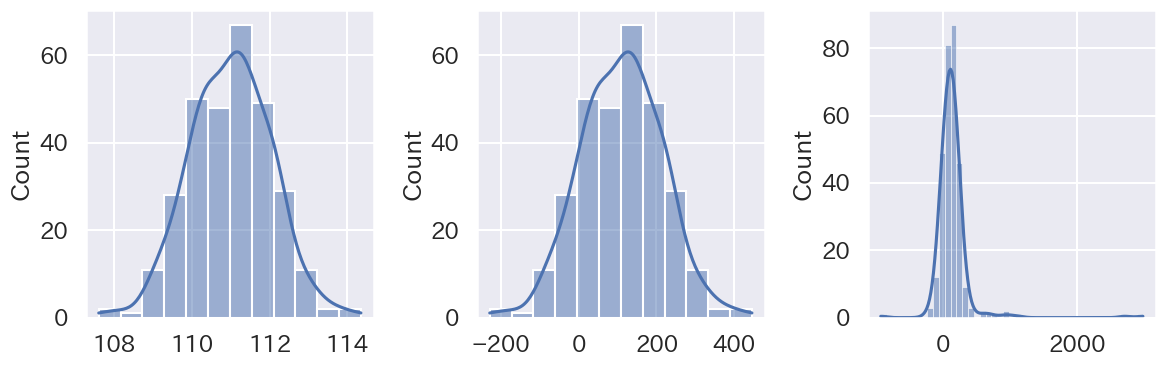

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 0], bins=12, kde=True, ax=axes[0])
sns.histplot(x=X[:, 1], bins=12, kde=True, ax=axes[1])
sns.histplot(x=X[:, 2], bins=45, kde=True, ax=axes[2])
plt.show()

StandardScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
+ 標準化
+ X = (x - 平均値) / 標準偏差
+ 平均0、標準偏差1の分布になるようスケーリング

In [35]:
X[:,0].std()

1.0436429942183167

In [36]:
X[:,0].mean()

111.00025764255105

In [37]:
X[:, 1].shape

(300,)

In [38]:
X[:, 1].reshape(-1, 1).shape

(300, 1)

In [21]:
# sts.fit_transform(X[:, 1].reshape(-1, 1))[:5]

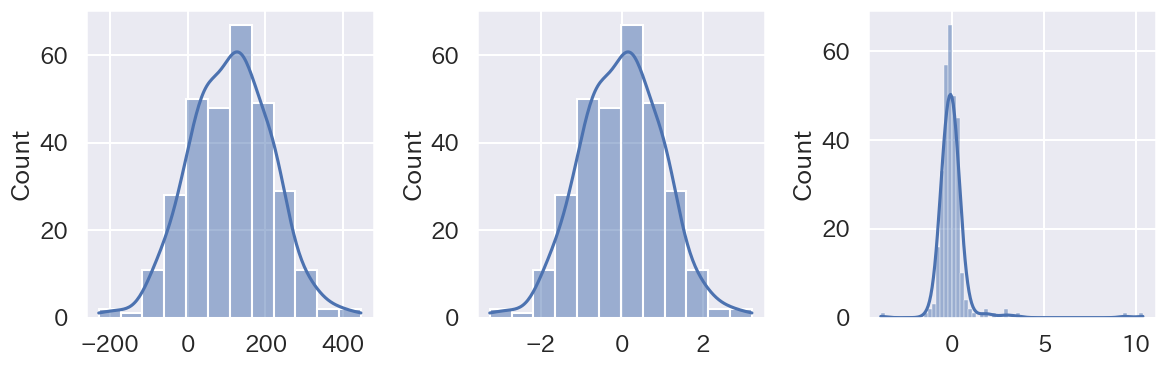

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], bins=12, kde=True, ax=axes[0])
sns.histplot(x=sts.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), bins=12, kde=True, ax=axes[1])
sns.histplot(x=sts.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), bins=66, kde=True, ax=axes[2])
plt.show()

MinMaxScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

* 正規化
* X = (x - 最小値) / (最大値 - 最小値)
* 最小0、最大1の分布になるようスケーリング

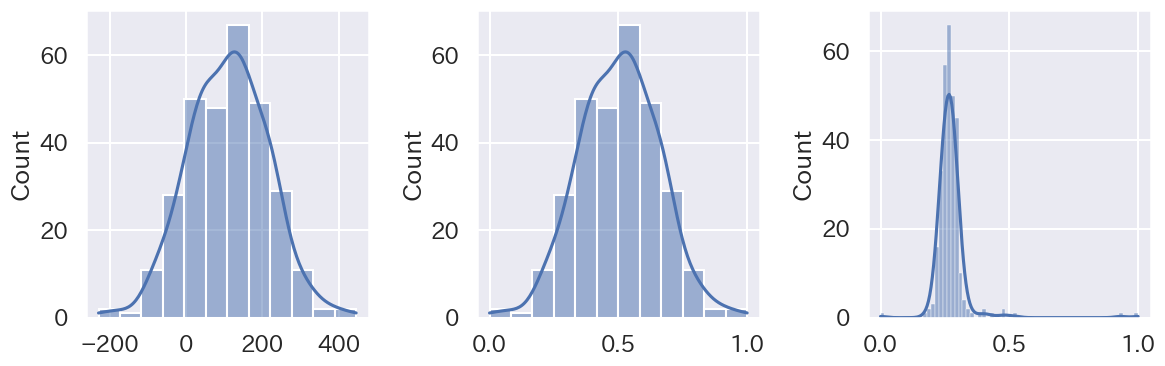

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], bins=12, kde=True, ax=axes[0])
sns.histplot(x=mms.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), bins=12, kde=True, ax=axes[1])
sns.histplot(x=mms.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), bins=66, kde=True, ax=axes[2])
plt.show()

MaxAbsScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html

* X = x / 最大絶対値
* X = x / maxabs
* -1～1の分布になるようスケーリング（少なくとも-1もしくは1の値を持つ）

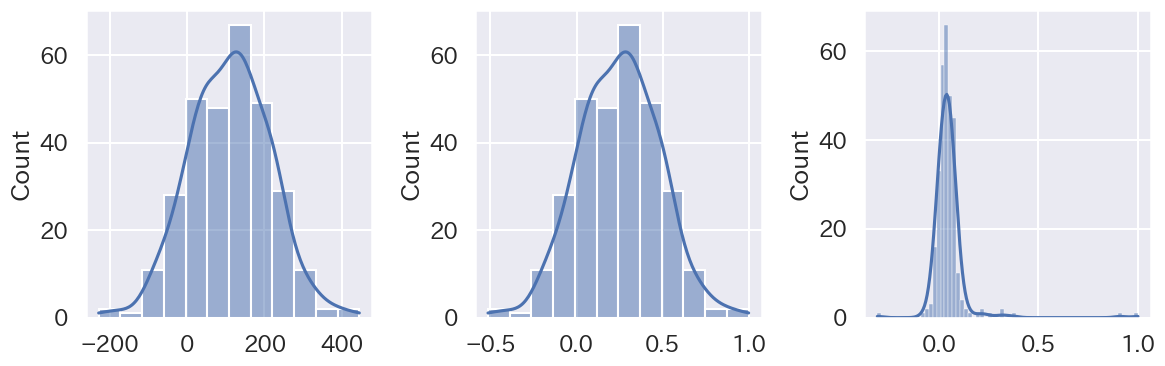

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], bins=12, kde=True, ax=axes[0])
sns.histplot(x=mas.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), bins=12, kde=True, ax=axes[1])
sns.histplot(x=mas.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), bins=66, kde=True, ax=axes[2])
plt.show()

RobustScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html  

* X = x - 中央値 / 四分位範囲
* X = x - med / IQR
* 中央値0、外れ値を除く大部分を対象にスケーリング

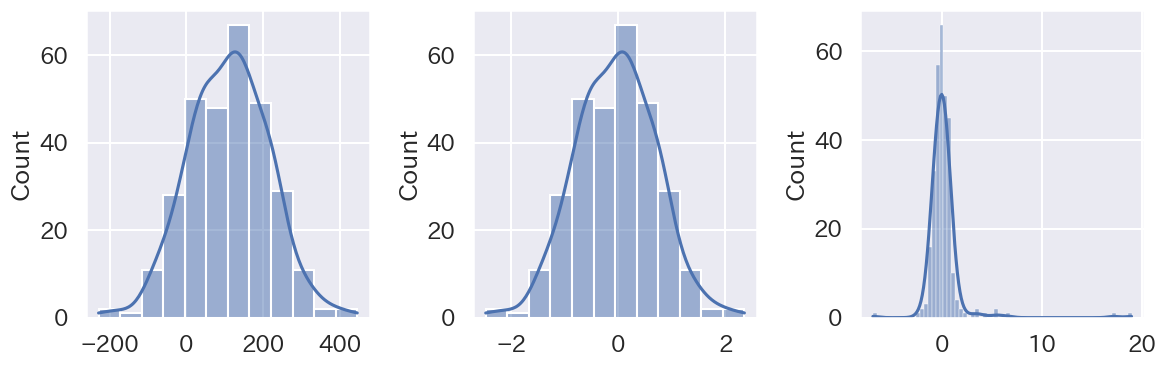

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
sns.histplot(x=X[:, 1], bins=12, kde=True, ax=axes[0])
sns.histplot(x=rbs.fit_transform(X[:, 1].reshape(-1, 1)).flatten(), bins=12, kde=True, ax=axes[1])
sns.histplot(x=rbs.fit_transform(X[:, 2].reshape(-1, 1)).flatten(), bins=66, kde=True, ax=axes[2])
plt.show()

---
<a id=2></a>
[Topへ](#0)

---
## 2. 非線形変換

* ボストン住宅価格データセット
  - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
  - Quinlan, R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
* QuantileTransformer  
    n_quantiles=1000, output_distribution='uniform'('normal')  
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html  
  PowerTransformer  
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

In [ ]:
# Toy datasetsのひとつ
# https://scikit-learn.org/stable/datasets/toy_dataset.html
# from sklearn.datasets import load_boston
# boston = load_boston()
# data, target, filename, DESCR, feature_names

# scikit-learnのバージョンにより上記のデータセットが使用できない場合があります
# その場合は下のセル内のコメントアウトを外し実行して学習をお進めください

# 使用不可の理由には特徴量のひとつが不適切であることが挙げられています
# https://scikit-learn.org/1.1/modules/generated/sklearn.datasets.load_boston.html
# ここでは特徴量の意味には触れず、プロット用のデータとして利用するのみです
# 学習用としてはこれまで通り使用可能となっておりますのでご安心ください

In [43]:
# 上記のload_bostonが使用できない場合は以下を実行し、学習をお進めください

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(data, columns=feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


QuantileTransformer / PowerTransformer

In [46]:
np.quantile(df['RM'], [0, 0.25, 0.5, 0.75, 1])

array([3.561 , 5.8855, 6.2085, 6.6235, 8.78  ])

In [47]:
np.percentile(df['RM'], [0, 25, 50, 75, 100])

array([3.561 , 5.8855, 6.2085, 6.6235, 8.78  ])

In [48]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [53]:
qut_n = QuantileTransformer(output_distribution='normal', n_quantiles=506)
qut_u = QuantileTransformer(output_distribution='uniform', n_quantiles=506)
pot = PowerTransformer()

In [50]:
def plot_transform(feature):
	qut_n_arr = qut_n.fit_transform(df[[feature]]).flatten()
	qut_u_arr = qut_u.fit_transform(df[[feature]]).flatten()
	pot_arr = pot.fit_transform(df[[feature]]).flatten()

	fig, axes = plt.subplots(1, 4, figsize=(18, 5), tight_layout=True)
	sns.histplot(x=df[feature], kde=True, bins=12, ax=axes[0], shrink=0.9)
	axes[0].set_title(feature)
	axes[0].set_xlabel('')
	sns.histplot(x=qut_n_arr, kde=True, bins=12, ax=axes[1], shrink=0.9)
	axes[1].set_title('Quantile_normal')
	sns.histplot(x=qut_u_arr, kde=True, bins=12, ax=axes[2], shrink=0.9)
	axes[2].set_title('Quantile_uniform')
	sns.histplot(x=pot_arr, kde=True, bins=12, ax=axes[3], shrink=0.9)
	axes[3].set_title('Power')

	plt.show()

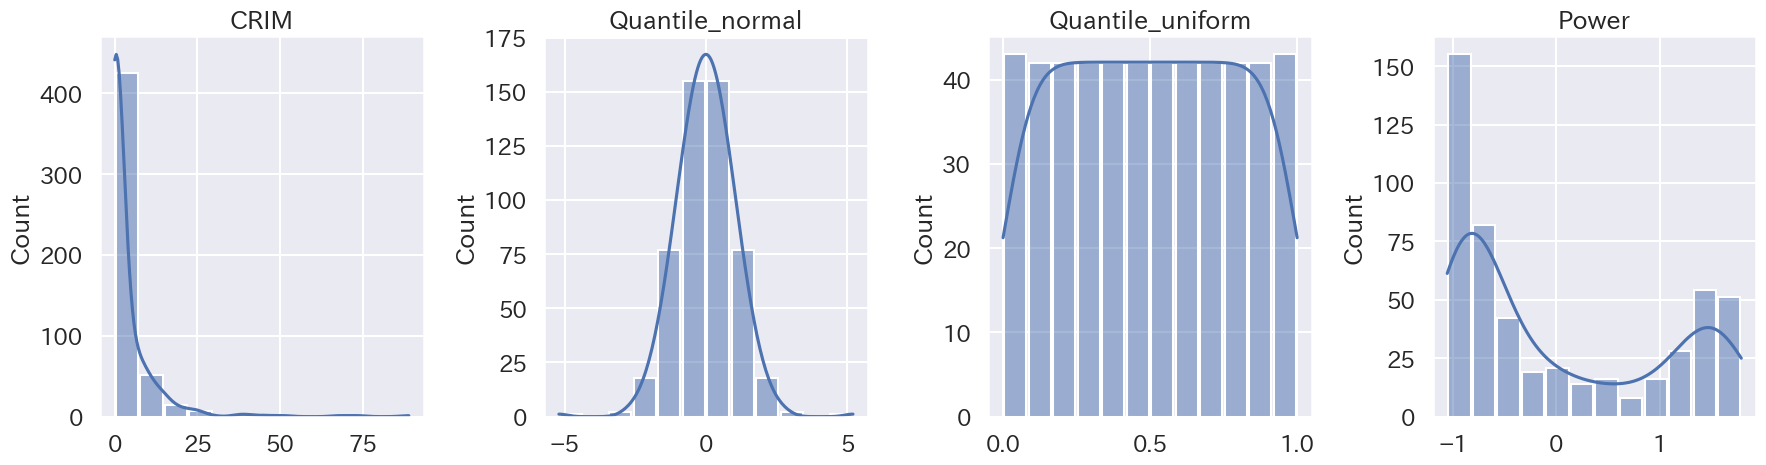

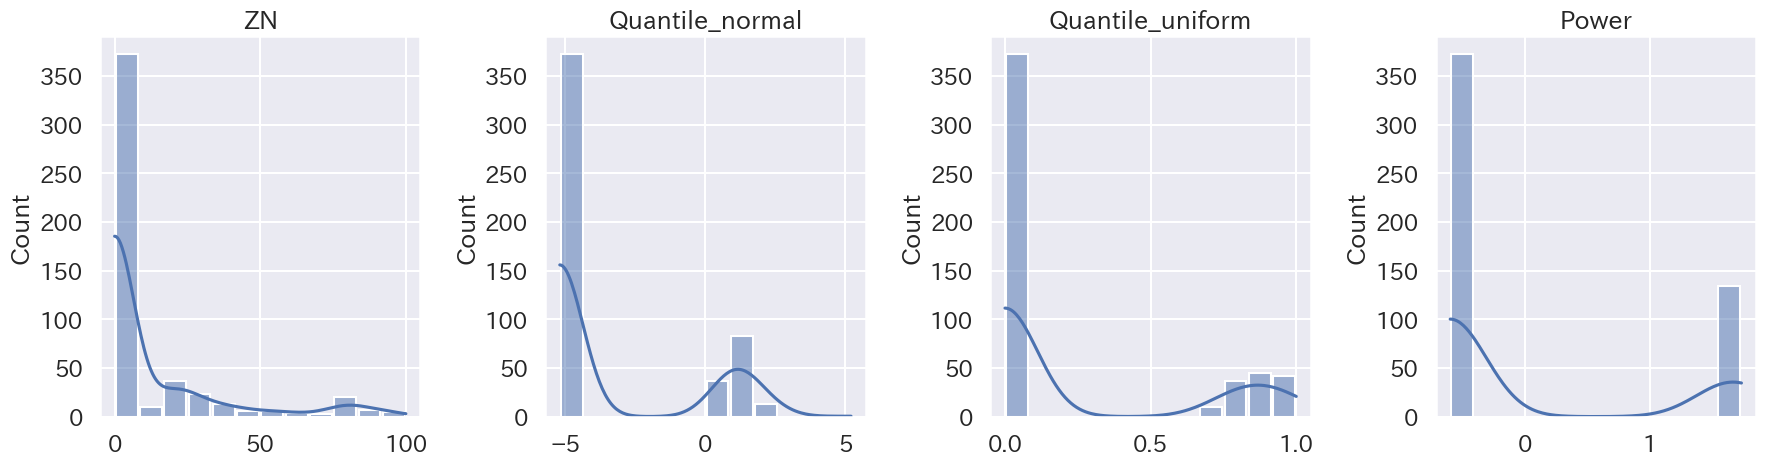

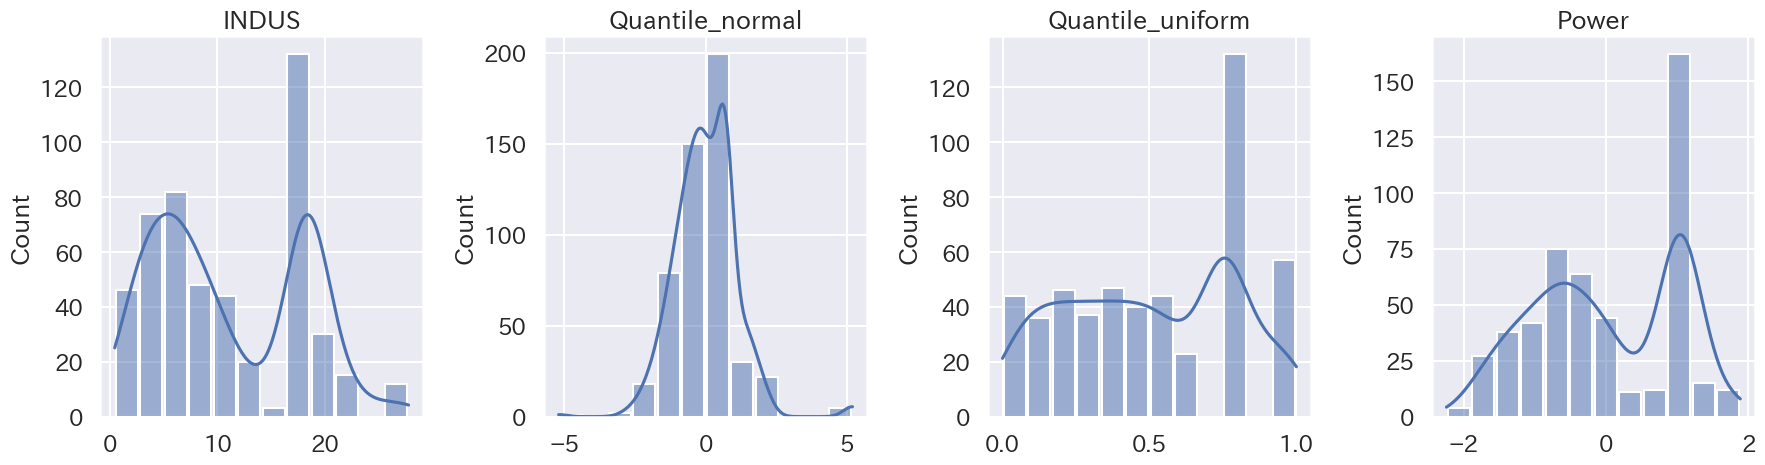

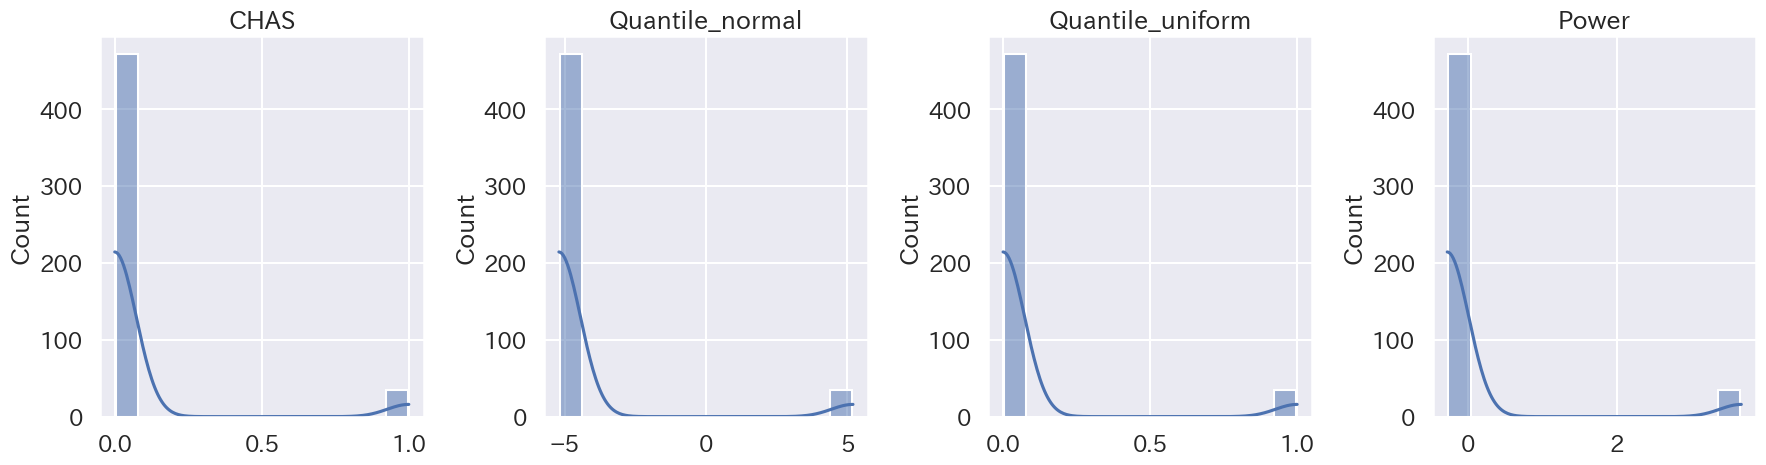

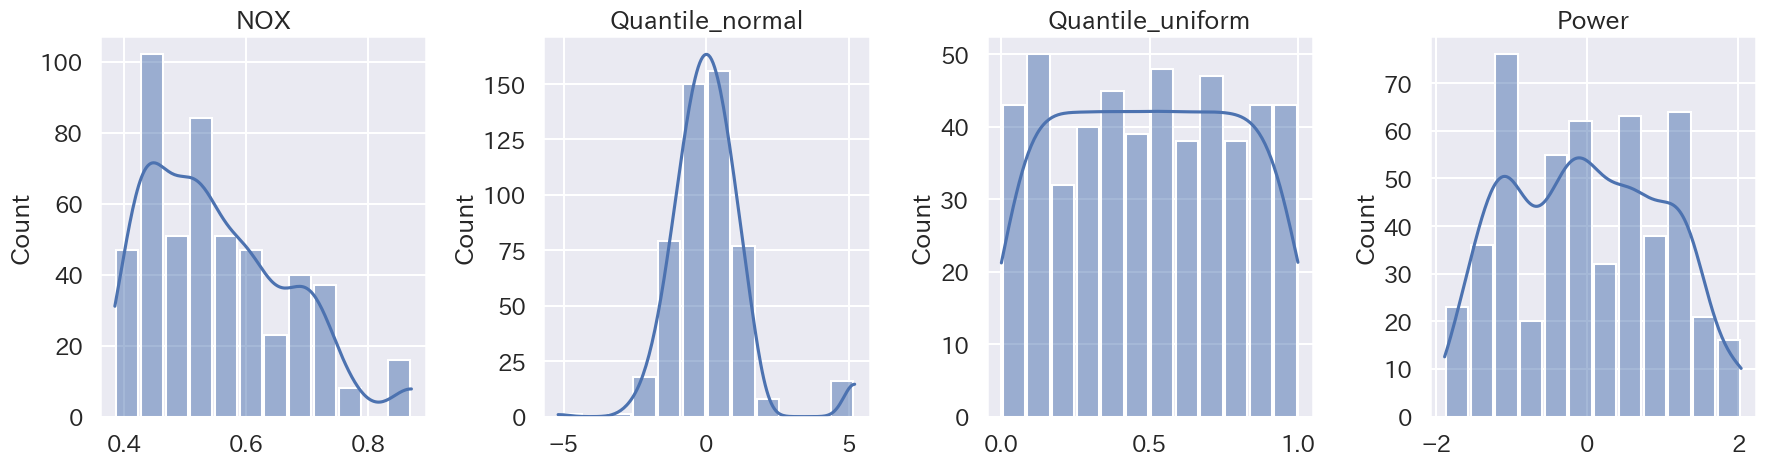

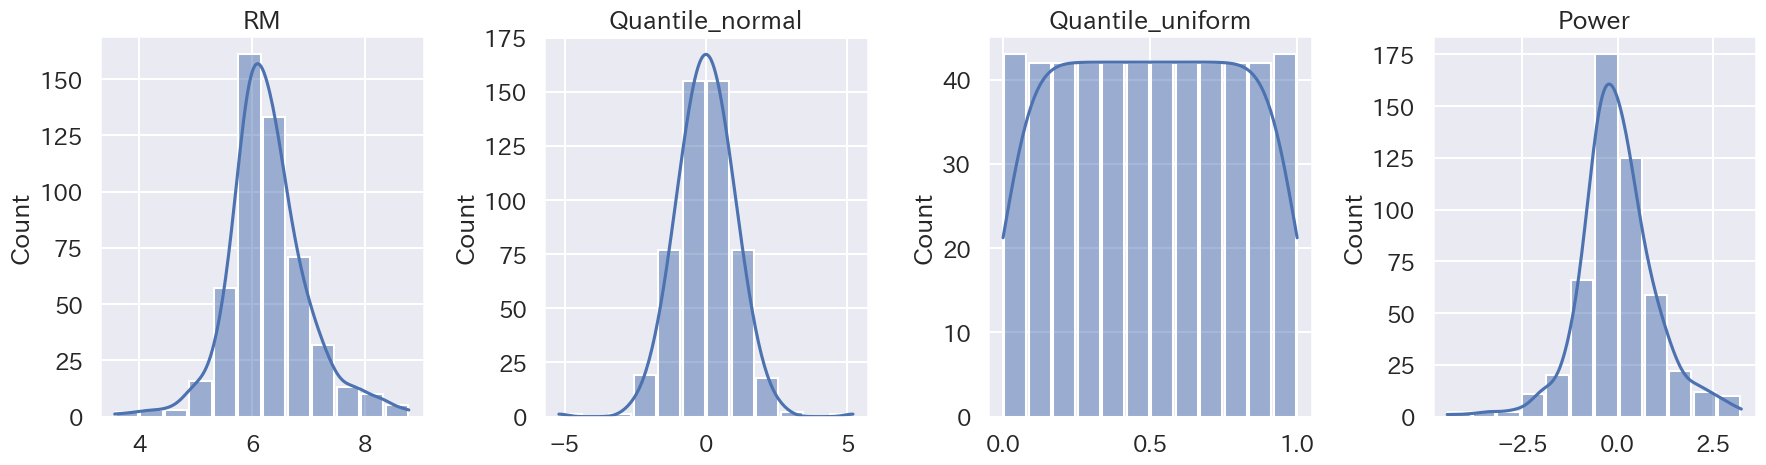

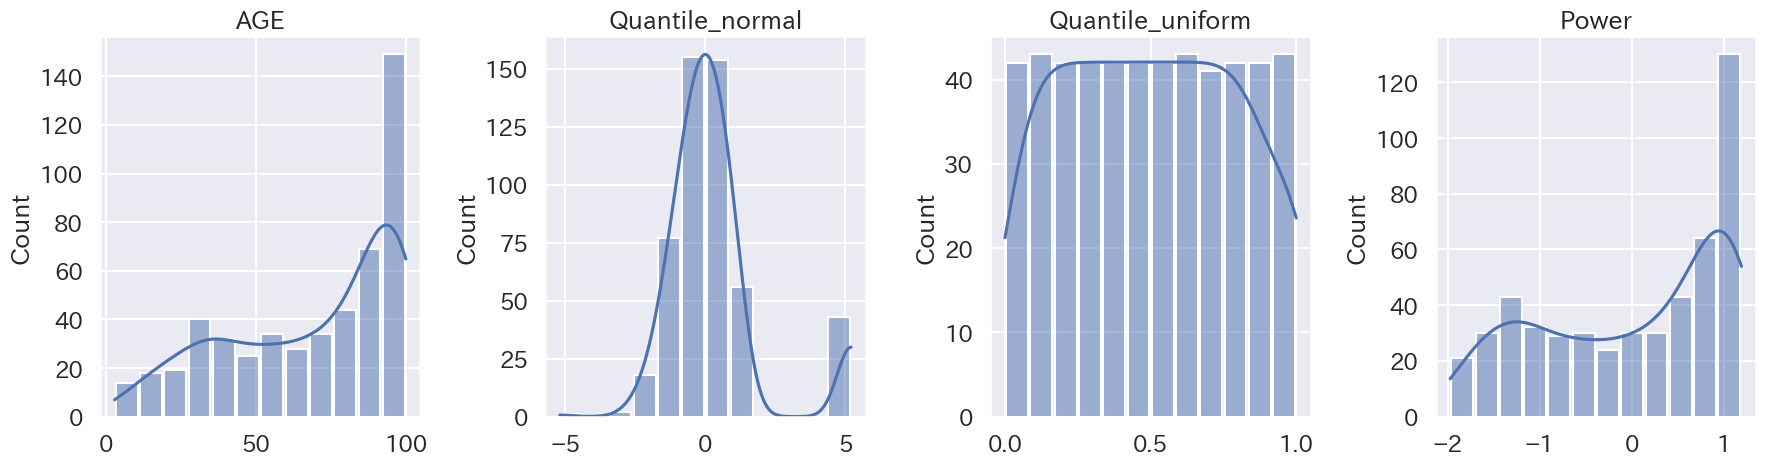

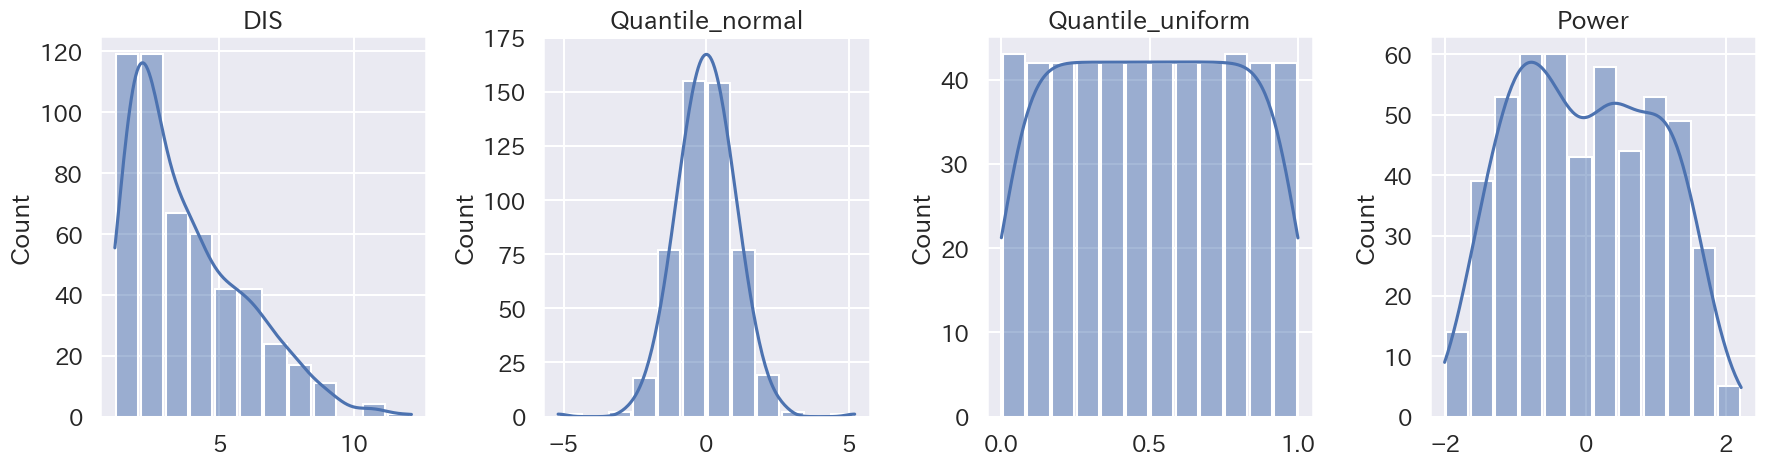

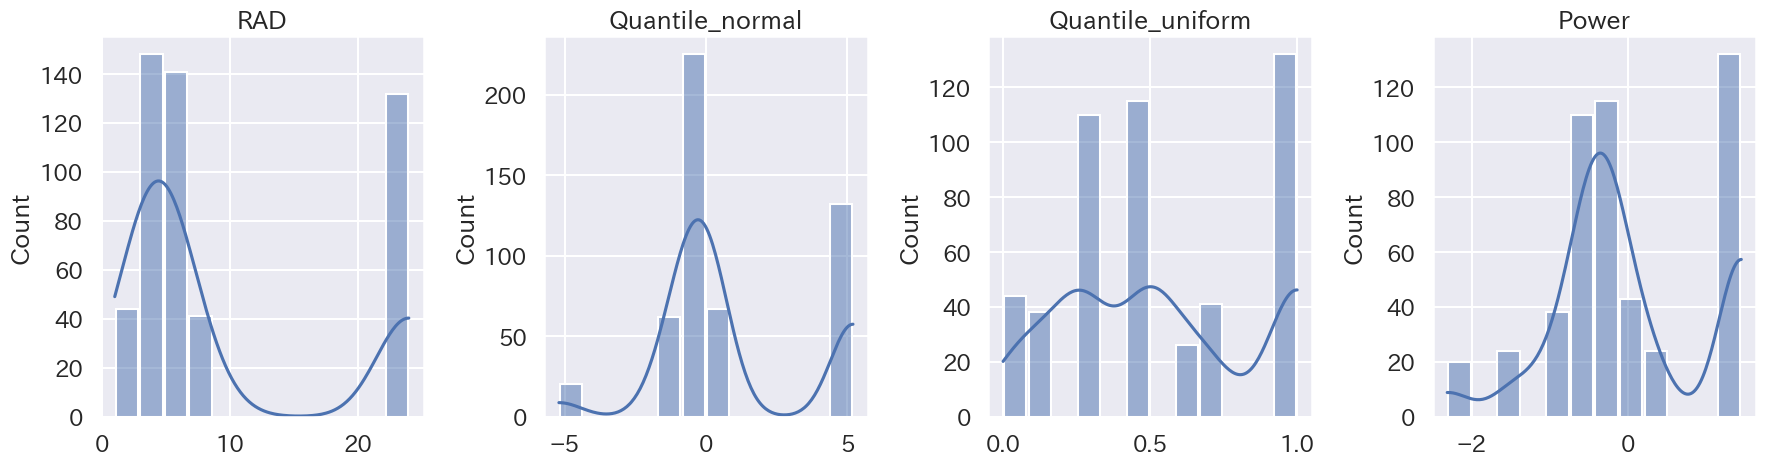

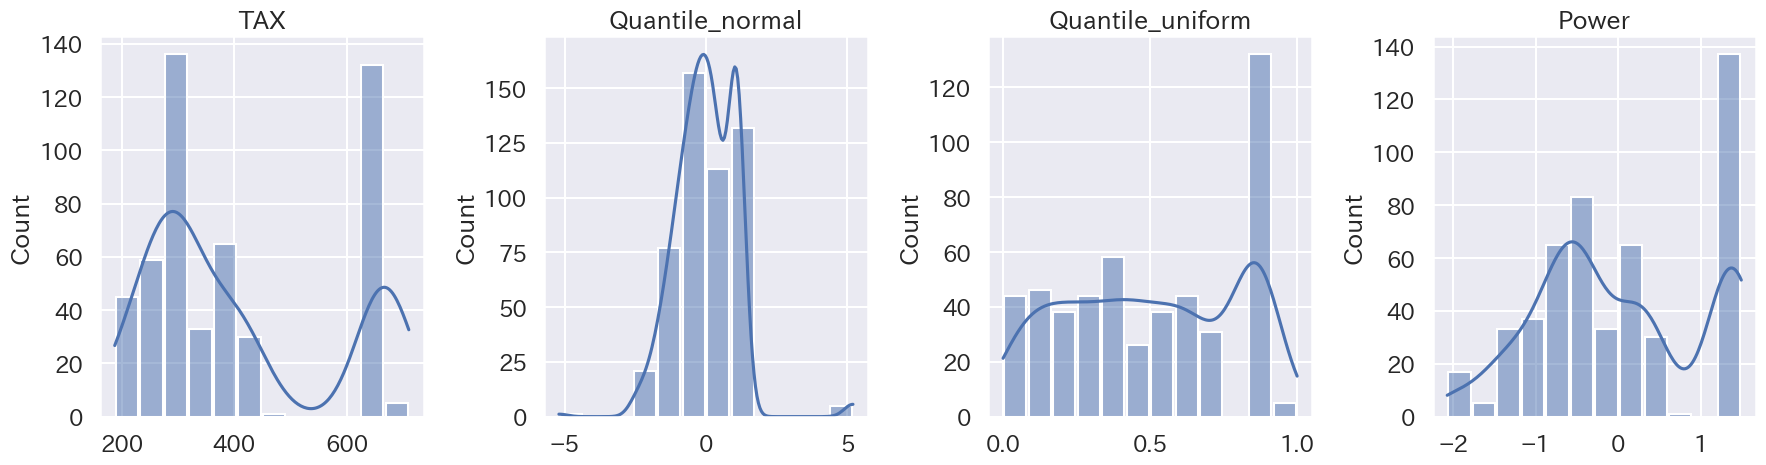

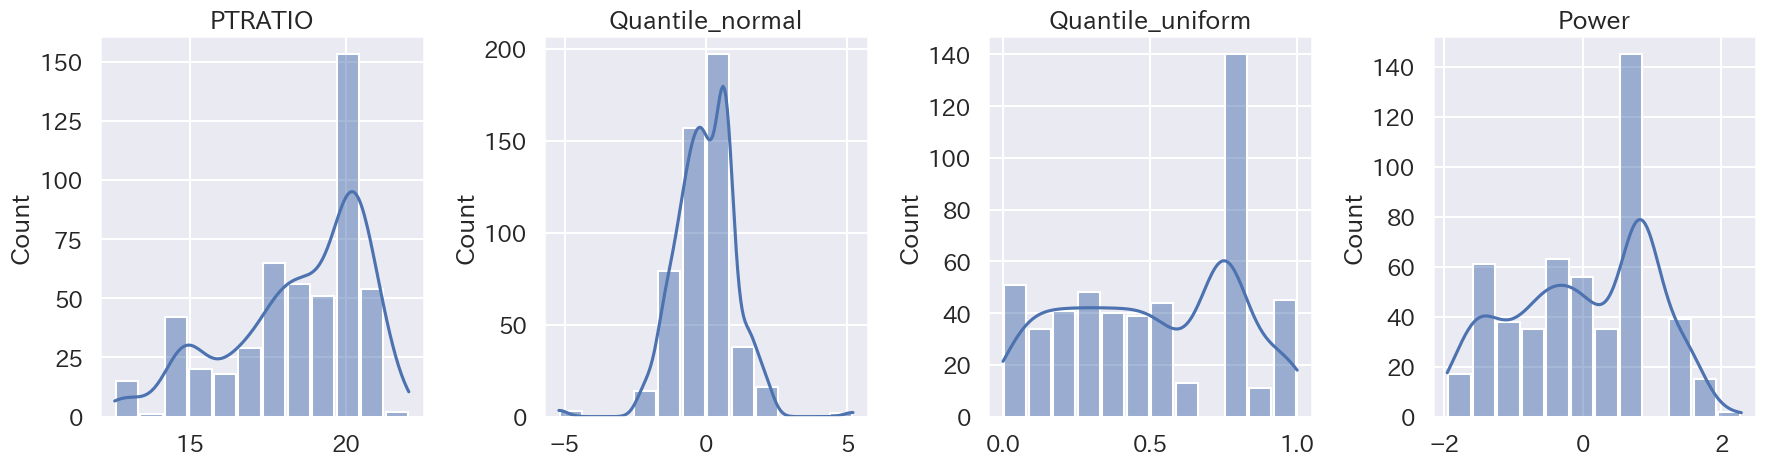

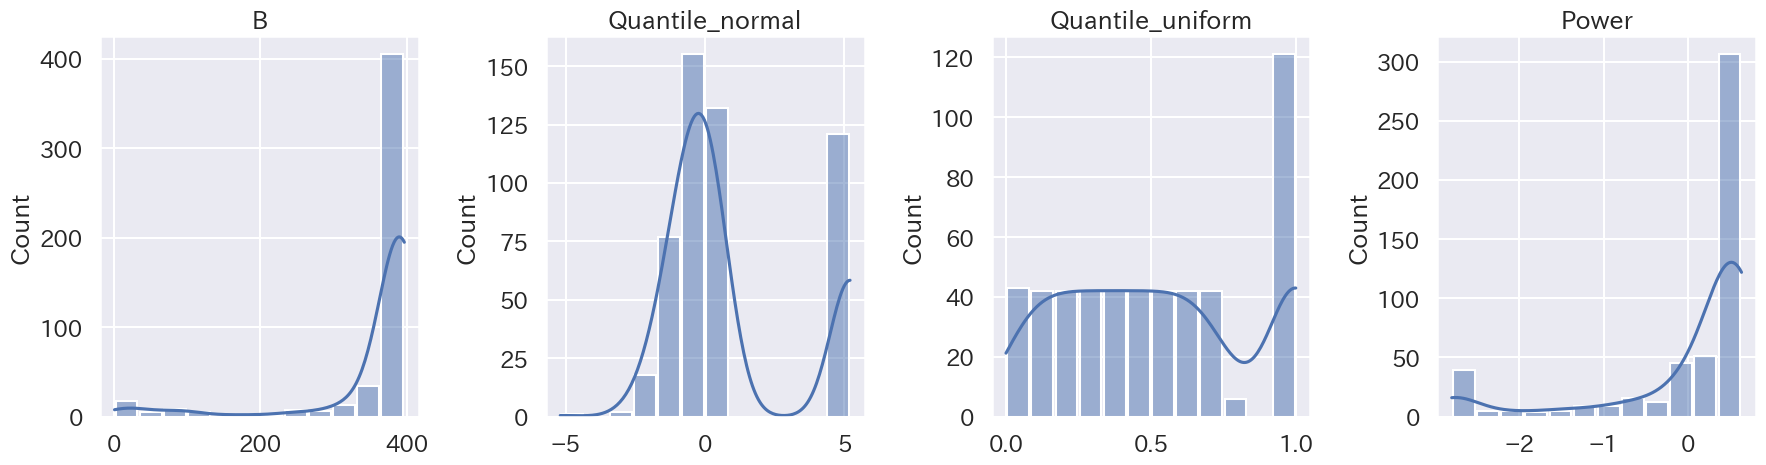

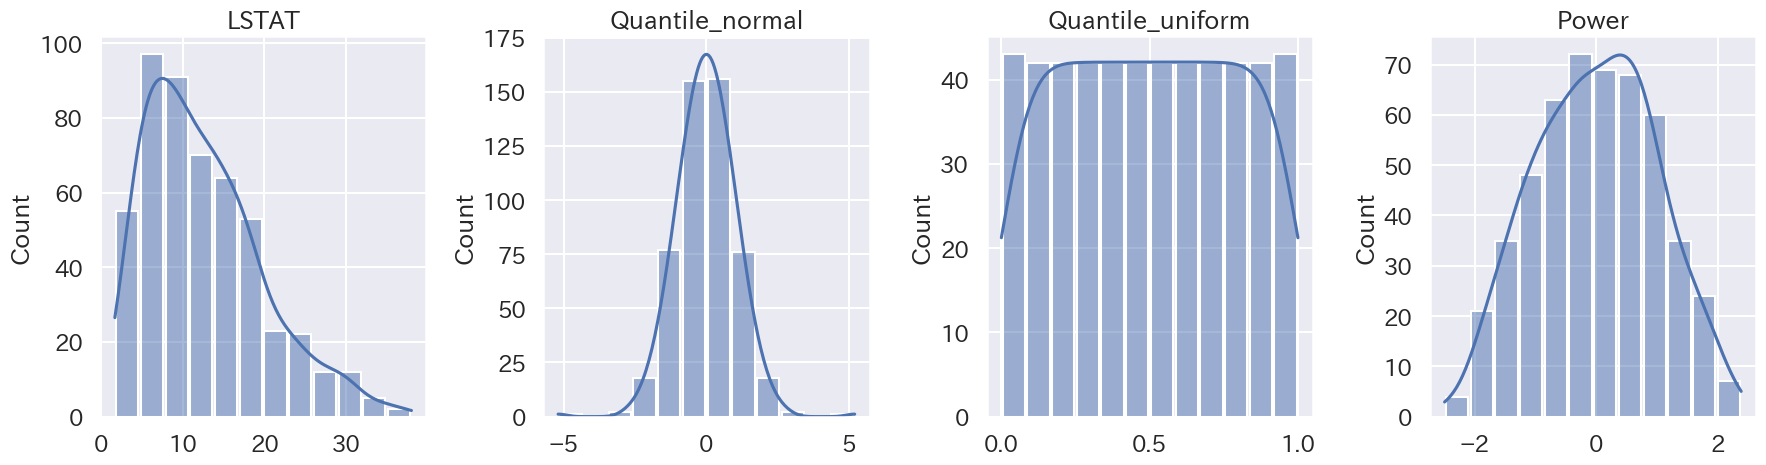

In [55]:
for feature in df.columns:
	plot_transform(feature)

---
<a id=3></a>
[Topへ](#0)

---
## 3. ビニング、離散化

* KBinsDiscretizer  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
* pd.cut()

KBinsDiscretizer  
Keyword Arguments : n_bins=5, strategy='quantile'('uniform', 'kmeans'),  encode='onehot'('onehot-dense', 'ordinal')

In [56]:
from sklearn.preprocessing import KBinsDiscretizer

In [58]:
df[['RM']].describe()

,RM
count,506.000000
mean,6.284634
std,0.702617
min,3.561000
25%,5.885500
50%,6.208500
75%,6.623500
max,8.780000


In [ ]:
# np.quantile()

In [60]:
x = df[['RM']].values
x.min(), x.max()

(3.561, 8.78)

In [63]:
np.quantile(x, (0, .25, .5, .75, 1))

array([3.561 , 5.8855, 6.2085, 6.6235, 8.78  ])

In [64]:
discretizer_q = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='ordinal')
discretizer_u = KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')

In [65]:
discretizer_q.fit(x)
discretizer_u.fit(x)

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [67]:
discretizer_q.transform(x)[:5]

array([[3.],
       [3.],
       [4.],
       [4.],
       [4.]])

In [84]:
np.quantile(x, (0, .2, .4, .6, .8, 1))

array([3.561, 5.837, 6.086, 6.376, 6.75 , 8.78 ])

In [70]:
x[:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [98]:
discretizer_q.transform([[3.6] , [5.837], [6.1], [6.4], [6.8]])

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [99]:
discretizer_o = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='onehot')

In [101]:
discretizer_o.fit_transform(x).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [102]:
np.linspace(3.561, 8.78, 6)

array([3.561 , 4.6048, 5.6486, 6.6924, 7.7362, 8.78  ])

In [109]:
discretizer_u.transform([[4], [5], [6], [7], [8]])

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

pd.cut()

In [118]:
classes = pd.cut(
				x.flatten(),
				bins=[3.560, 5.837, 6.086, 6.376, 6.75 , 8.78 ],
				labels=['very low', 'low', 'medium', 'high', 'very hight']
)
classes
# rightを含み、leftを含まない

['high', 'high', 'very hight', 'very hight', 'very hight', ..., 'high', 'medium', 'very hight', 'very hight', 'low']
Length: 506
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very hight']

In [119]:
type(classes)

pandas.core.arrays.categorical.Categorical

In [120]:
classes.unique()

['high', 'very hight', 'low', 'medium', 'very low']
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very hight']

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---